In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
# Import state vector file using geopandas
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

## Choose lat/lon Boundaries

In [4]:
# Subset Parameters
# Slice/Subset data down further based on latitutde (-90 -- +90), longitude (0 -- 360)
lat_bnds, lon_bnds = [23, 57], [230, 265]

baseDir='/glade/scratch/currierw/ACCESS1-0/historical/'

## Load data and subset it to western US

In [5]:
#### Choose lat and lon
lat_bnds, lon_bnds  = [23, 57],                      [230, 265]                      # Slicing for Temperature, HUS, Ps etc. (Theta Values)
lat_bndsV,lon_bndsV = [lat_bnds[0]-1,lat_bnds[1]+1], [lon_bnds[0], lon_bnds[1]]      # Slciing for V winds (north-south) add 1 degree buffer to south and north
lat_bndsU,lon_bndsU = [lat_bnds[0],lat_bnds[1]],     [lon_bnds[0]-1, lon_bnds[1]+1]  # Slicing for U winds (east-west) add 1 degree buffer to west and east

#### Data

# Choose U, V, Ta, Hus files from the same time-period
fNameVa  = baseDir+'va_6hrLev_ACCESS1-0_historical_r1i1p1_1980010106-1981010100.nc'
fNameUa  = baseDir+'ua_6hrLev_ACCESS1-0_historical_r1i1p1_1980010106-1981010100.nc'
fNameTa  = baseDir+'ta_6hrLev_ACCESS1-0_historical_r1i1p1_1980010106-1981010100.nc'

# open the datasets (ds) with xarray
vads  = xr.open_dataset(fNameVa)
uads  = xr.open_dataset(fNameUa) 
tads  = xr.open_dataset(fNameTa) 

# Slice/Subset 4D data
vads_sub  = vads.sel(lat=slice(*lat_bndsV), lon=slice(*lon_bndsV))  # subset the Va data spatially
uads_sub  = uads.sel(lat=slice(*lat_bndsU), lon=slice(*lon_bndsU))  # subset the Ua data spatially
tads_sub  = tads.sel(lat=slice(*lat_bnds),  lon=slice(*lon_bnds))  # subset the ta data spatially

## Interpolate U,V Data to the Temperature Grid

In [6]:
# Interpolate data from staggered grid to temperature grid
print("\nInterpolating Data")
uads_subI = uads_sub.interp(lat=tads_sub['lat'], lon=tads_sub['lon'])
vads_subI = vads_sub.interp(lat=tads_sub['lat'], lon=tads_sub['lon'])


Interpolating Data


## Explore U/V Vertical Grid

In [11]:
print("U Data\n")
print("Lower Level Z height")
print((uads_subI['lev'][0] + uads_subI['b'][0]*uads_subI['orog'][-1,-1]).values)
print("\nUpper Level Z height")
print((uads_subI['lev'][-1] + uads_subI['b'][-1]*uads_subI['orog'][-1,-1]).values)
print("\nLower Level: Boundary")
print(uads_subI['lev_bnds'][0].values)
print("\nUpper Level: Boundary")
print(uads_subI['lev_bnds'][-1].values)
print("\nLower Level: lev")
print(uads_subI['lev'][0].values)
print("\nUpper Level: lev")
print(uads_subI['lev'][-1].values)
print("\nLower Level: b")
print(uads_subI['b'][0].values)
print("\nUpper Level: b")
print(uads_subI['b'][-1].values)

U Data

Lower Level Z height
210.82827006918373

Upper Level Z height
36081.76171875

Lower Level: Boundary
[ 0.         49.99888229]

Upper Level: Boundary
[36081.76171875 42427.90234375]

Lower Level: lev
9.99820613861084

Upper Level: lev
36081.76171875

Lower Level: b
0.99771649

Upper Level: b
0.0


## Explore Temperature Vertical Grid

In [8]:
print("\nLower Level Z height")
print((tads_sub['lev'][0] + tads_sub['b'][0]*tads_sub['orog'][-1,-1]).values)
print("\nUpper Level Z height")
print((tads_sub['lev'][-1] + tads_sub['b'][-1]*tads_sub['orog'][-1,-1]).values)
print("\nLower Level: Boundary")
print(tads_sub['lev_bnds'][0].values)
print("\nUpper Level: Boundary")
print(tads_sub['lev_bnds'][-1].values)
print("\nLower Level: lev")
print(tads_sub['lev'][0].values)
print("\nUpper Level: lev")
print(tads_sub['lev'][-1].values)
print("\nLower Level: b")
print(tads_sub['b'][0].values)
print("\nUpper Level: b")
print(tads_sub['b'][-1].values)


Lower Level Z height
190.81172690757506

Upper Level Z height
39254.83203125

Lower Level: Boundary
[ 0.         49.99888229]

Upper Level: Boundary
[36081.76171875 42427.90234375]

Lower Level: lev
20.000337600708008

Upper Level: lev
39254.83203125

Lower Level: b
0.99771649

Upper Level: b
0.0


## What are the elevation values

1865.7295
1705.5343017578125
1545.3391


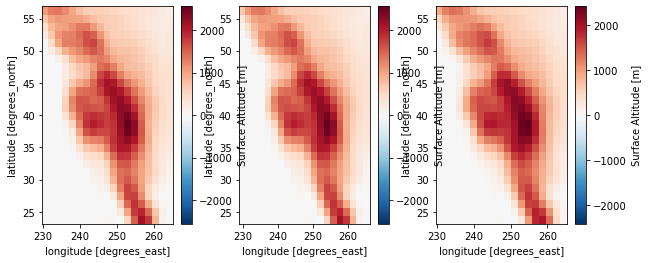

In [9]:
print(tads_sub['orog'][10,10].values)
print(uads_subI['orog'][10,10].values)
print(uads_sub['orog'][10,10].values)

fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
tads_sub['orog'].plot(ax=axes[0])
uads_sub['orog'].plot(ax=axes[1])
uads_subI['orog'].plot(ax=axes[2])